In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]
select_columns_bool = True
select_labels =[0,1,2,3,4,5,6,7,8,9,10]#
#["raw","MINERVA+ (sv=8)", "MINERVA+ (sv=9)","MINERVA+ (sv=10)","MINERVA (sv=8)","MINERVA (sv=9)","MINERVA (sv=10)"]# ["raw","ComBat","limma","SmartSVA (sv=10)","MINERVA (sv=10)"]##[0.20,0.40,0.60,0.80]#["raw","ComBat","BMC","limma","SmartSVA (sv=1)","MINERVA (sv=1)"]# ["5-mer","6-mer","7-mer"]#

#[0,1,2,3,10,20,40,60,80,100,140,150,200,220,240,260,300]#[0,1,2,3,10,20,30,40,50, 60, 70, 80 ,10]#
lin_model = "reg"
phen = "DiseaseState"#"bin_crc_normal"#"DiseaseState"#"bin_crc_adenomaORnormal"# "bmi_corrected" #"bin_antibiotic_last_year"#"bin_crc_normal"#"""bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
phen_pretty = "colorectal cancer status"#"BMI"#"antibiotic history" #"bmi"#"colorectal cancer status"#"Preterm Birth"#"
phen_type = "class"
not_rotate = False
data_type = "kmer"
trans = "clr_scale" #[0,0,0,0,1,1]#
numPc = [0,1,2,3,4,5,6,7,8,9,10]##[20,30,40,50,60,70,80,90,100,110,120,130,150,200]#[0,0,0,0,3,1,2]#[0,1,2,3,4,5,6,7,8,9,10]###,20,30,40,50,100,120,140] #[0,0,0,0,10,10,1] # [0
folder_names = ['CRC_wirbel_otu' for i in range(len(numPc))]
#folder_names = ['AGP_max_k6_subsample_' + str(i) + '_seed_1' for i in [20,40,60,80]]
#['CRC_k6' for i in range(len(numPc))]#
# ["AGP_max_k5","AGP_max_k6","AGP_max_k7"]#,"AGP_max_k8"]#['AGP_max_k7' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE','smartsva_first2filter_TRUE','minerva_first2filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]

#file_names = ['rawfilter_TRUE']+['mine3rva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

#file_names =['rawfilter_TRUE']+['minerva_plus_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,4)] + ['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(4,7)] 
file_names =['rawfilter_TRUE']+['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#file_names =['rawfilter_TRUE' for i in range(0,len(numPc))] 

#file_names =['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
# #
# file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE',
#              'smartsva_first10filter_TRUE','minerva_first10filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#'bmcfilter_TRUE','limmafilter_TRUE', ''refactor_first2filter_TRUE',
#file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE', 'smartsva_first6filter_TRUE','refactor_first7filter_TRUE','minerva_first7filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

file_names = [f + "_trans_" + trans for f in file_names]
nice_names = ["6" + '-mer' for i in range(len(numPc))]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of predicted body mass index (BMI)'# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    metric_word =  'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = ["Naive Bayes" for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 


In [4]:
folder_names

['CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu']

In [5]:
len(file_names)

11

In [6]:
folder_names

['CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu',
 'CRC_wirbel_otu']

In [7]:
df_metric = pd.DataFrame()

In [8]:
phen

'DiseaseState'

In [9]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        # "_lin_model_" + lin_model + "/cont_pred/"
        filename_temp = data_folder + folder_names[f] +"/"+ data_type + "_BatchCorrected_" + phen + "_"+ file_names[f] +"_pearson_and_mse.pkl"
        
    else:
        filename_temp = data_folder + folder_names[f] + "/"+ data_type + "_BatchCorrected_"+ phen + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all":
            index = folder_names[f] + file_names[f]
            #index = folder_names[f]
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #index = folder_names[f] + file_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_wirbel_otu/kmer_BatchCorrected_DiseaseState_rawfilter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_wirbel_otu/kmer_BatchCorrected_DiseaseState_refactor_first1filter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_wirbel_otu/kmer_BatchCorrected_DiseaseState_refactor_first2filter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_wirbel_otu/kmer_BatchCorrected_DiseaseState_refactor_first3filter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_wirbel_otu/kmer_BatchCorrected_DiseaseState_refactor_first4filter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_wirbel_otu/kmer_BatchCorrected_DiseaseState_refactor_first5filter_TRUE_trans_clr_sca

In [10]:
file_names

['rawfilter_TRUE_trans_clr_scale',
 'refactor_first1filter_TRUE_trans_clr_scale',
 'refactor_first2filter_TRUE_trans_clr_scale',
 'refactor_first3filter_TRUE_trans_clr_scale',
 'refactor_first4filter_TRUE_trans_clr_scale',
 'refactor_first5filter_TRUE_trans_clr_scale',
 'refactor_first6filter_TRUE_trans_clr_scale',
 'refactor_first7filter_TRUE_trans_clr_scale',
 'refactor_first8filter_TRUE_trans_clr_scale',
 'refactor_first9filter_TRUE_trans_clr_scale',
 'refactor_first10filter_TRUE_trans_clr_scale']

In [11]:
filename_temp

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/CRC_wirbel_otu/kmer_BatchCorrected_DiseaseState_refactor_first10filter_TRUE_trans_clr_scale_classification_auc.pkl'

In [12]:
df_metric.shape


(50, 11)

In [13]:
df_metric
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

,CRC_wirbel_oturawfilter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first1filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first2filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first3filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first4filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first5filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first6filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first7filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first8filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first9filter_TRUE_trans_clr_scale,CRC_wirbel_oturefactor_first10filter_TRUE_trans_clr_scale
0,0.742831,0.720629,0.736818,0.736355,0.725486,0.719241,0.712303,0.727336,0.728723,0.727105,0.723404
1,0.784228,0.771508,0.773127,0.768039,0.772895,0.773589,0.770583,0.777058,0.778908,0.786309,0.786309
2,0.800725,0.801449,0.792754,0.794928,0.791787,0.801691,0.779952,0.785749,0.783333,0.790338,0.795652
3,0.804831,0.800966,0.807005,0.810628,0.805797,0.818116,0.796860,0.809662,0.804831,0.808213,0.814010
4,0.666667,0.667150,0.670531,0.676812,0.675845,0.672947,0.675845,0.676329,0.672464,0.672464,0.680676
5,0.746068,0.736818,0.737743,0.760407,0.753700,0.737280,0.734274,0.737280,0.739593,0.736818,0.732192
6,0.746531,0.736818,0.735661,0.741906,0.742831,0.741212,0.734043,0.755319,0.748381,0.731267,0.728492
7,0.768116,0.777295,0.777536,0.776570,0.779952,0.778019,0.771981,0.773188,0.765217,0.766184,0.761353
8,0.764976,0.763527,0.765700,0.761111,0.778019,0.784058,0.786473,0.779710,0.788406,0.784541,0.798551
9,0.771014,0.748309,0.756522,0.745652,0.741787,0.729227,0.725121,0.724638,0.725604,0.725121,0.732367


In [14]:
file_names

['rawfilter_TRUE_trans_clr_scale',
 'refactor_first1filter_TRUE_trans_clr_scale',
 'refactor_first2filter_TRUE_trans_clr_scale',
 'refactor_first3filter_TRUE_trans_clr_scale',
 'refactor_first4filter_TRUE_trans_clr_scale',
 'refactor_first5filter_TRUE_trans_clr_scale',
 'refactor_first6filter_TRUE_trans_clr_scale',
 'refactor_first7filter_TRUE_trans_clr_scale',
 'refactor_first8filter_TRUE_trans_clr_scale',
 'refactor_first9filter_TRUE_trans_clr_scale',
 'refactor_first10filter_TRUE_trans_clr_scale']

In [15]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

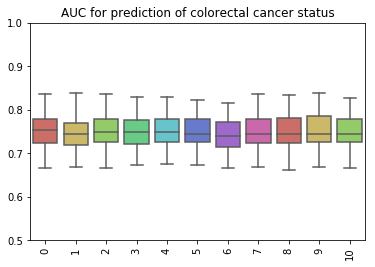

In [16]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
if metric_word == "pearson":
    g.set(ylim=(-0.1, 0.3))
else:
    g.set(ylim=(0.5,1))
g.set_title(title)
plt.savefig(plot_folder + data_type + "_" + trans + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + data_type + "_" + trans +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')




In [17]:
df_metric.mean(axis=0)

CRC_wirbel_oturawfilter_TRUE_trans_clr_scale                 0.751855
CRC_wirbel_oturefactor_first1filter_TRUE_trans_clr_scale     0.745796
CRC_wirbel_oturefactor_first2filter_TRUE_trans_clr_scale     0.748656
CRC_wirbel_oturefactor_first3filter_TRUE_trans_clr_scale     0.749510
CRC_wirbel_oturefactor_first4filter_TRUE_trans_clr_scale     0.751483
CRC_wirbel_oturefactor_first5filter_TRUE_trans_clr_scale     0.749007
CRC_wirbel_oturefactor_first6filter_TRUE_trans_clr_scale     0.742415
CRC_wirbel_oturefactor_first7filter_TRUE_trans_clr_scale     0.748750
CRC_wirbel_oturefactor_first8filter_TRUE_trans_clr_scale     0.747681
CRC_wirbel_oturefactor_first9filter_TRUE_trans_clr_scale     0.748856
CRC_wirbel_oturefactor_first10filter_TRUE_trans_clr_scale    0.746879
dtype: float64

In [18]:
plot_folder

'/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'